# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read in Data

In [2]:
# Set working directory
%cd C:/Users/sriha/OneDrive/Desktop/DS/My work/life-expectancy

# Unpickle preprocessed training data
X_train = pd.read_pickle('Data/X_train_clean.pkl')

# Unpickle train target variable
y_train = pd.read_pickle('Data/y_train.pkl')

C:\Users\sriha\OneDrive\Desktop\DS\My work\life-expectancy


In [3]:
# Combine X and y for visualization and to determine correlations
df_train = X_train.join(y_train)
df_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
2323,Singapore,2005,Developed,69.0,9.0,1.49,2356.731479,96.0,33,10.0,...,3.74,96.0,0.1,29869.853980,1340952.0,2.1,2.0,0.821,12.6,82.0
915,Finland,2014,Developing,78.0,7.0,8.80,6164.455402,93.0,0,8.5,...,9.68,98.0,0.1,49914.618640,5461512.0,0.9,0.8,0.890,17.0,89.0
2910,Zambia,2011,Developing,366.0,29.0,2.57,183.046169,81.0,13234,44.0,...,4.26,81.0,6.3,1644.619672,14264756.0,6.6,6.4,0.543,12.0,58.2
1764,Mozambique,2015,Developing,355.0,60.0,1.19,0.000000,8.0,79,81.0,...,5.91,8.0,3.9,528.312560,281691.0,3.6,3.5,0.414,9.1,57.6
2365,Solomon Islands,2011,Developing,186.0,8.0,0.99,229.668749,99.0,0,9.5,...,5.80,99.0,0.1,1642.837974,539614.0,1.2,1.2,0.497,9.4,68.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,Turkmenistan,2001,Developing,221.0,7.0,2.35,106.180706,97.0,9,9.0,...,3.87,95.0,0.1,774.476339,45648.0,3.6,3.5,0.000,10.2,64.0
542,Chad,2001,Developing,4.0,42.0,0.30,26.874391,35.0,24908,75.0,...,6.90,26.0,4.8,197.315644,866312.0,11.3,11.2,0.300,4.9,48.0
1019,Ghana,2006,Developing,288.0,41.0,1.70,129.026336,84.0,420,62.0,...,4.64,84.0,2.9,922.935168,22113425.0,7.9,7.9,0.510,8.7,59.4
43,Algeria,2004,Developing,14.0,19.0,0.45,220.393699,81.0,3289,23.0,...,3.54,86.0,0.1,2598.982300,3283196.0,6.2,6.1,0.673,11.7,72.3


# Define Function to Visualize Data

In [4]:
def plot_feature(data, column):
  '''
  Make plots for 'column'
  Left: Distribution of feature
  Right: Dependance of sale price on the feature
  '''
  sns.set_style('whitegrid')
  plt.figure(figsize = (16, 6))
  plt.subplot(1, 2, 1)

  order = data.groupby(by=[column])['Life expectancy '].mean().sort_values().index

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.distplot(data[column])
  else:
    sns.countplot(x=column, 
                  data=data,
                  order=order) 

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=0, fontsize=12)
  plt.ylabel('Count', fontsize=14)

  
  plt.subplot(1, 2, 2)

  if data[column].dtype == 'int64' or data[column].dtype == 'float64':
    sns.regplot(x=column, 
                y='Life expectancy ', 
                data=data,
                scatter_kws={'alpha':0.2})
  else:
    sns.boxplot(x = column,
                y = 'Life expectancy ', 
                data=data,
                order = order)

  plt.xlabel(column, fontsize=14)
  plt.xticks(rotation=0, fontsize=12)
  plt.ylabel('Life expectancy ', fontsize=14)
  plt.subplots_adjust(wspace=.4)
  plt.show()


def heatmap(corr_matrix):
  sns.clustermap(corr_matrix,
                 annot=False,
                 cmap='Blues')
  plt.show()

# Visualizations and Observations

### 1. Some expected trends:

- Life expectancy is _inversely correlated_ with **adult mortality**, **infant mortality**, **under-five deaths**, as well as **incidence of HIV/AIDS and measles**.

- **Thinness in children and teenagers** is also _inversely correlated_ with life expectancy. This also tells us that thinness here could indicate lack of access to adequate nutrtion. 

- Life expectancy is _directly corelated_, to varying degrees, with **expenditure on healthcare**, **GDP**, **level of schooling** and **immunization against hepatitis B, polio and diptheria**. 

- Life expectancy tends to be _higher_ in developed countries. 


### 2. An unexpected result:

- Life expectancy is _directly correlated_ (albeit very weakly) with **net alcohol consumption per capita**. The expectation would be that alcohol consumption reduces life expectancy, but maybe there is more to it than a simple correlation. 

### 3. Correlations:

- Many of the features only seem to be _weakly_ correlated to the _target variable_. This gives us a starting point to decide whether to later drop some of these features.

- On the other hand, some features are very _strongly_ correlated with _each other_. These will need to be accounted for to avoid multicollinearity. 


### 4. Observations on frequency distributions:

- Several features are skewed. Since we aim for minimum skew and a normal distribution we will attempt to normalize these features. 

- Features with left-skew: **'Hepatits B'**, **'Polio'**, **'Diptheria'**

- Features with right-skew: **'Adult mortality'**, **'Infant deaths**', **'Under-Five deaths'**, **'Alcohol'**, **'Percentage expediture'**, **'Measles'**, **'HIV/AIDS'**, **'GDP'**, **'Thinness 1-19'**, **'Thinness 5-9'**.

- All the skewed features will need to be normalized before proceeding. 
 
- **Note:** The target feature 'Life expectancy' also has a slight skew, and we may choose to normalize this. This will have to be reversed before the final predictions are made. 

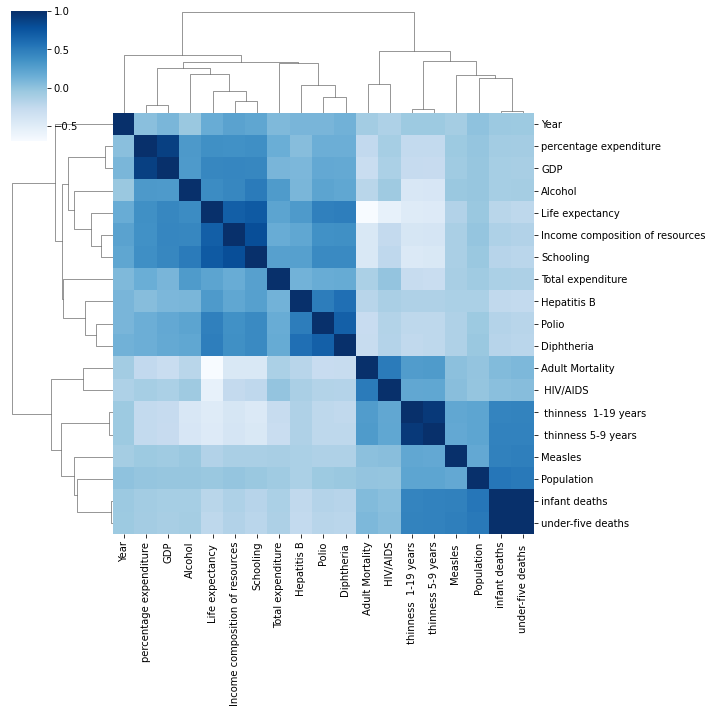

In [5]:
corr1 = df_train.corr()
heatmap(corr1)

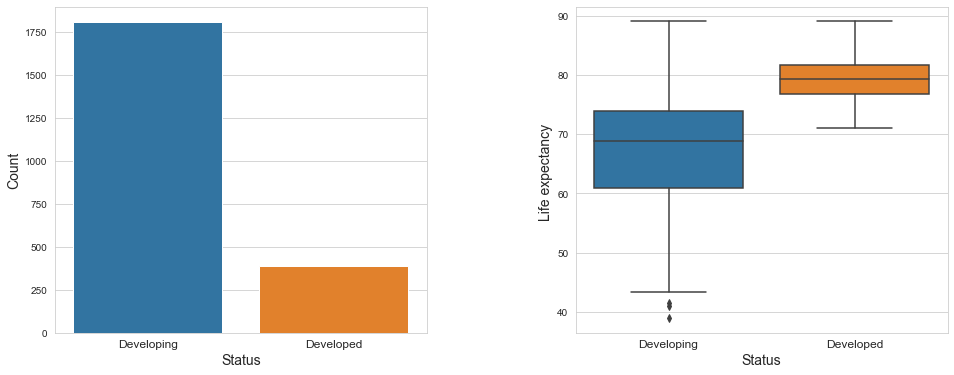

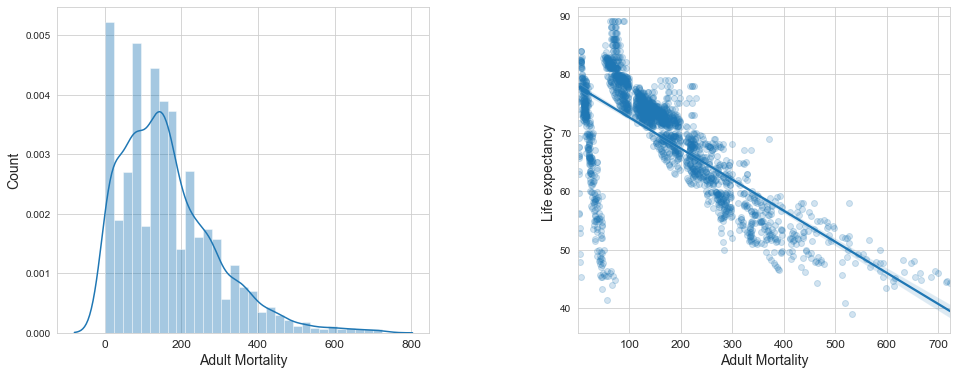

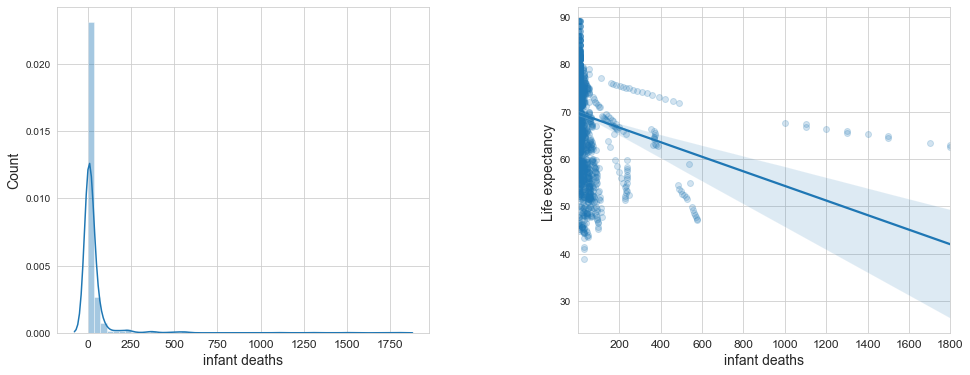

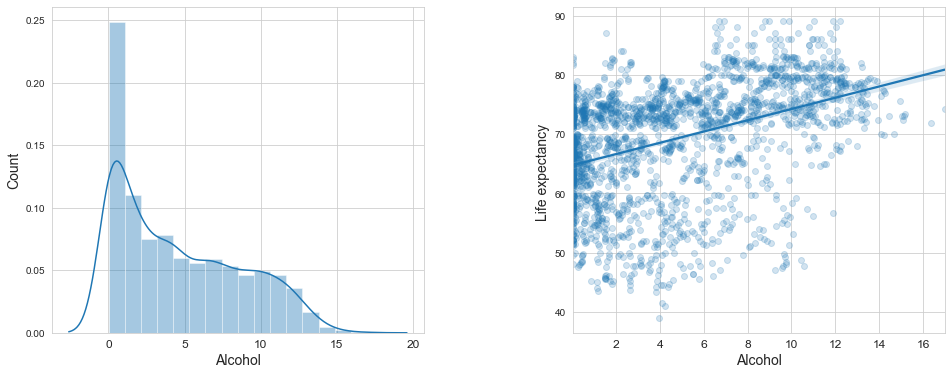

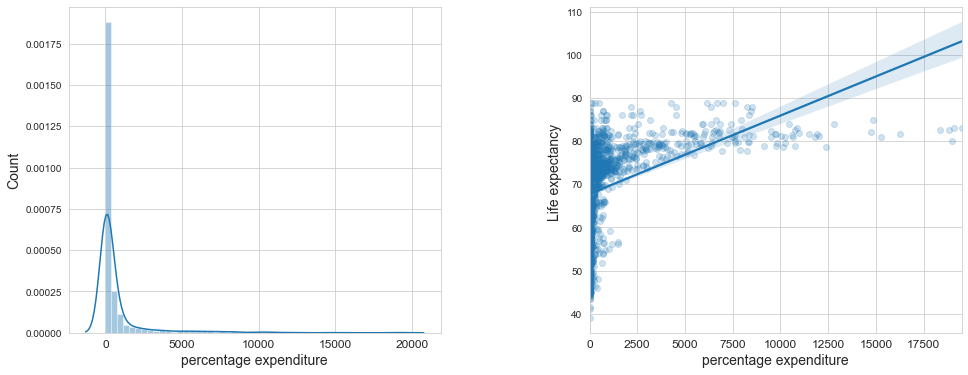

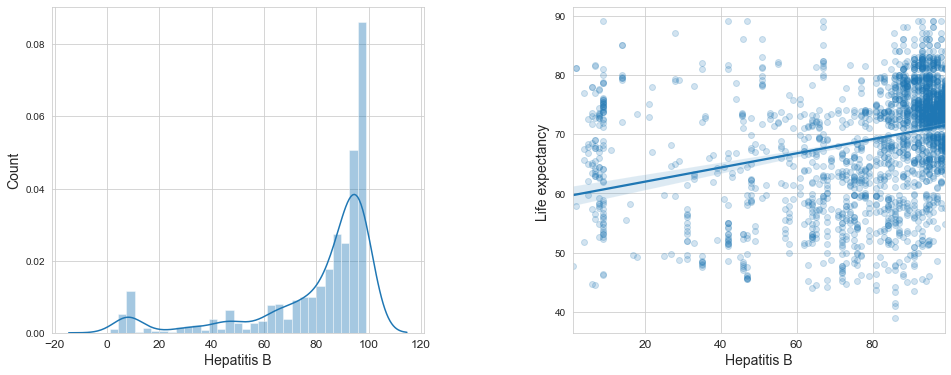

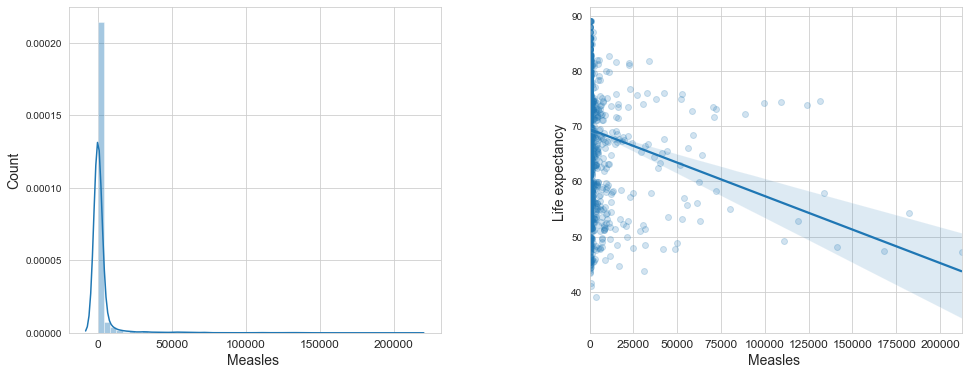

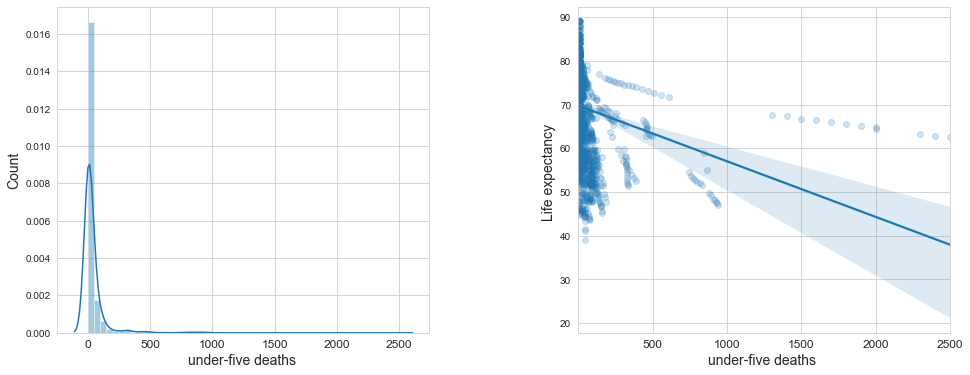

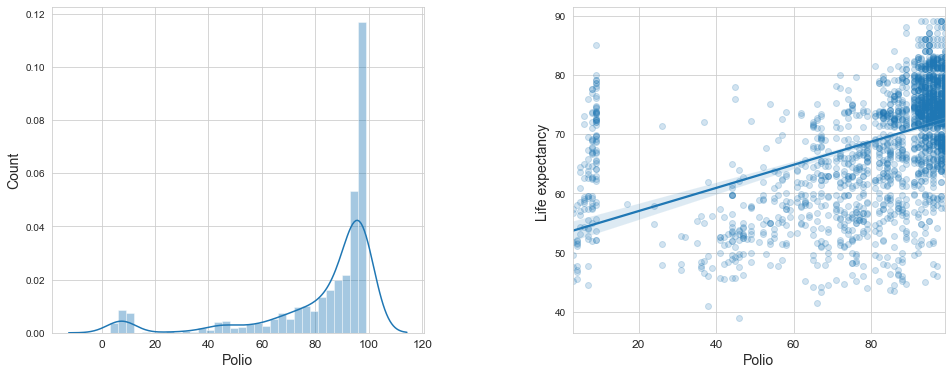

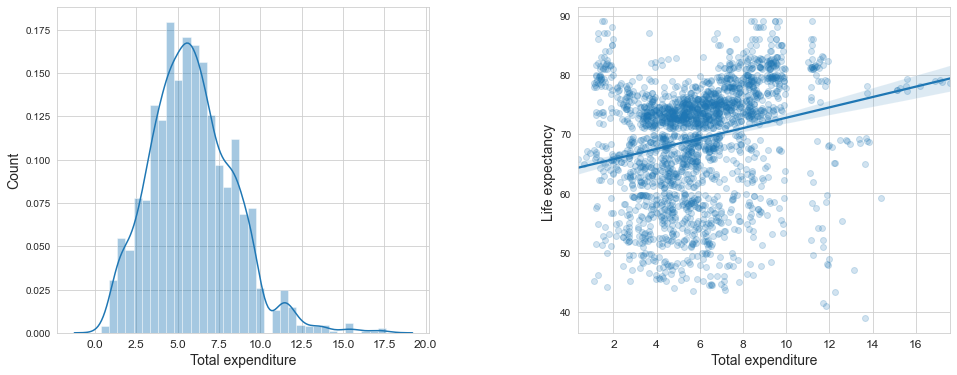

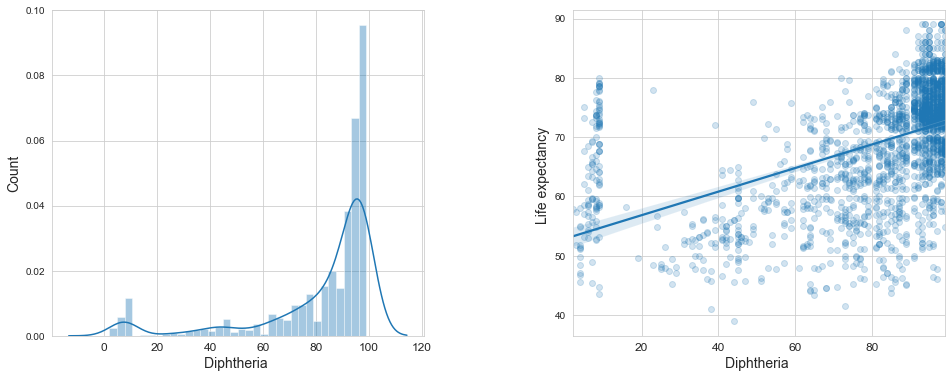

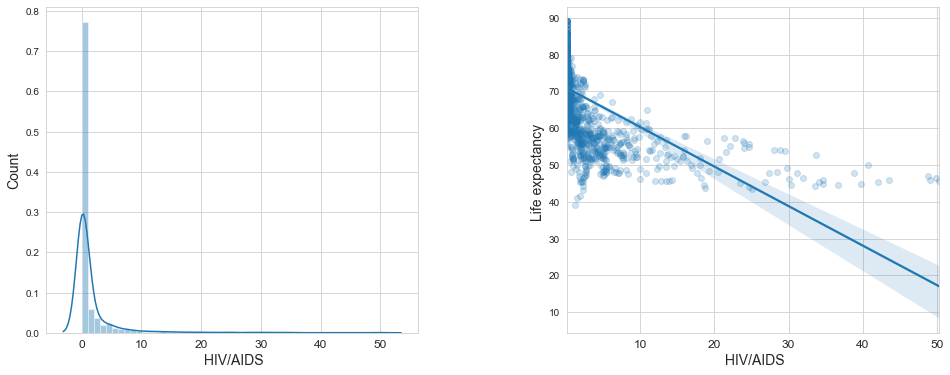

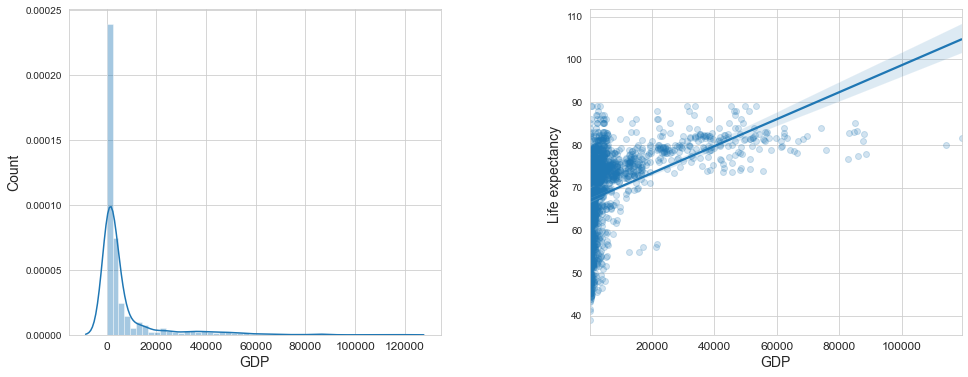

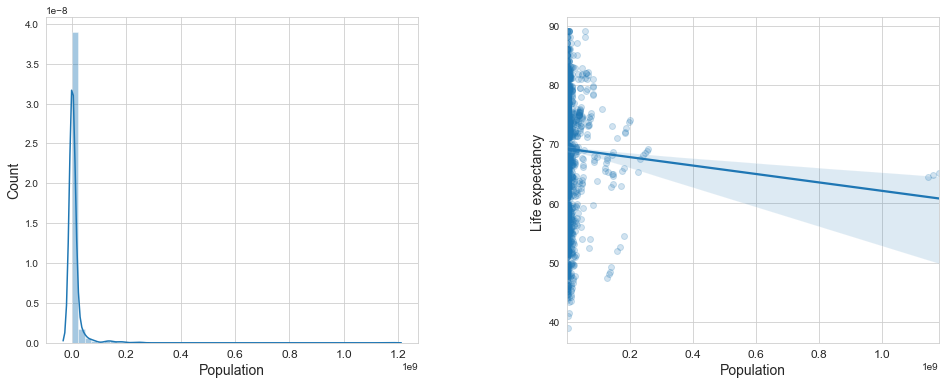

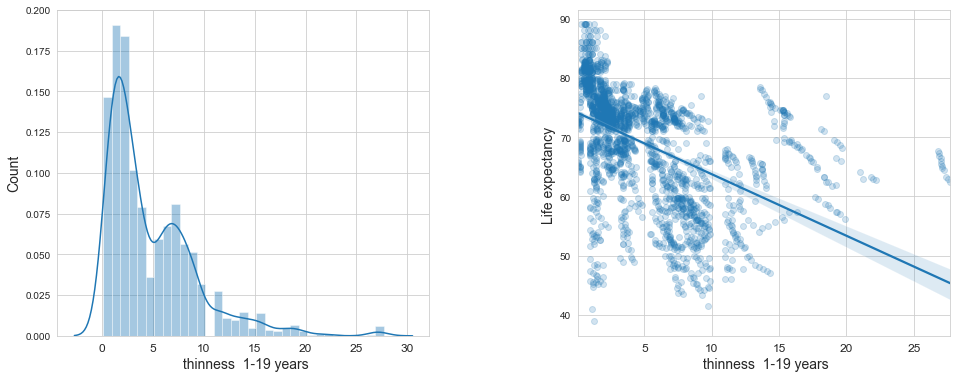

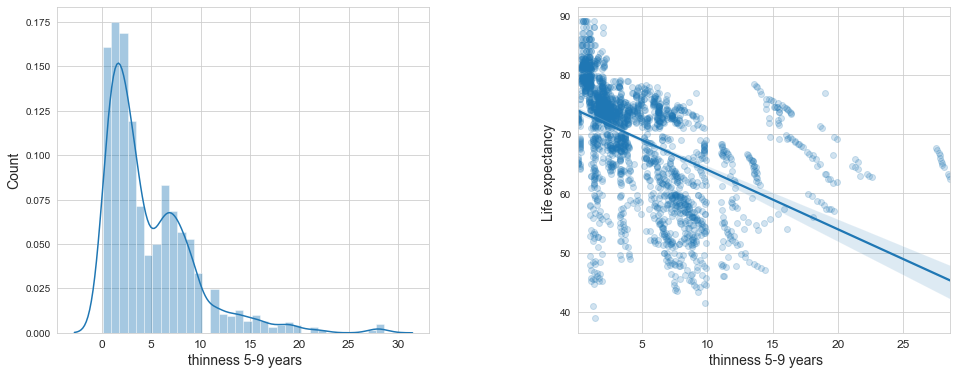

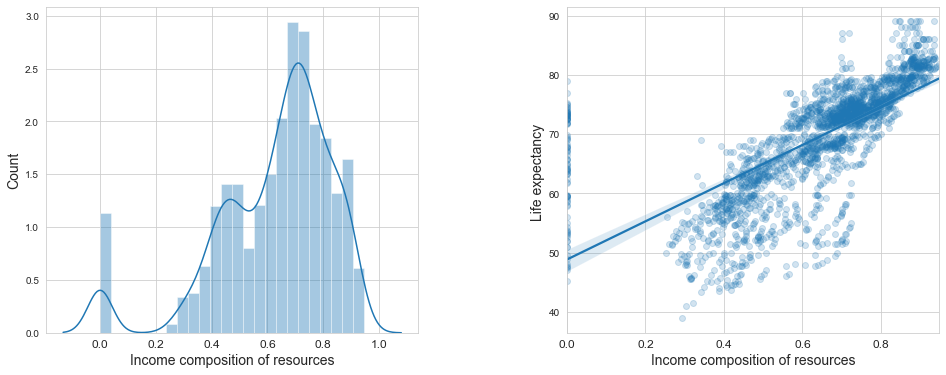

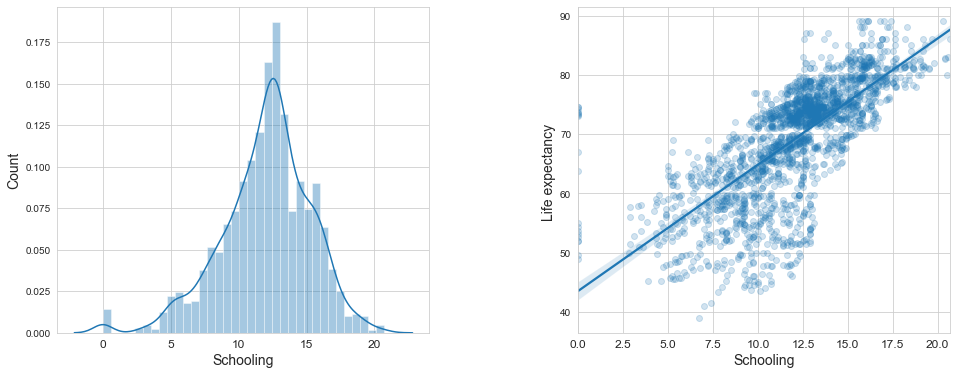

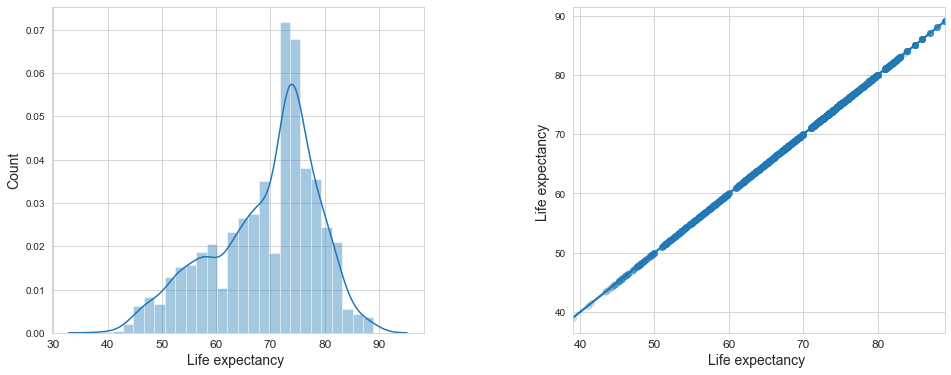

In [6]:
for column in df_train.columns[2:]:#len(df_train.columns)-1]:
    plot_feature(df_train, column)